In [1]:
import requests
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# our own package for reading the data
import sddk

In [2]:
# read and execute our script for modelling dates
script_url = "https://raw.githubusercontent.com/sdam-au/modelling_temporal_uncertainty/master/scripts/modelling_distributions.py"
# execute the script
exec(requests.get(script_url).content)

In [2]:
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648560@au.dk
sciencedata.dk password: ··········
connection with shared folder established with you as its ordinary user
endpoint variable has been configured to: https://sciencedata.dk/sharingout/648597%40au.dk/SDAM_root/


In [26]:
# read the EDH dataset from sciencedata.dk
publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_attrs_cleaned_2020-09-28.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,...,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,...,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",{},...,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,...,Certain,NULL,NULL,Sevilla,Certain,Tomares,Certain,NULL,NULL,131 AD – 170 AD
3,Gräf,votive inscription,2.5 cm,0200,"AE 1983, 0533. (B); A.U. Stylow, Gerión 1, 198...",checked with photo,(39) cm,[ ]AVS[ ]LLA / M PORCI NIGRI SER / DOMINAE VEN...,[{'name': '[---?]AV(?)S(?)[---]L(?)L(?)A M. Po...,18 cm,...,Certain,Ipolcobulcula,Certain,Córdoba,Certain,Carcabuey,Certain,NULL,NULL,151 AD – 200 AD
4,Feraudi,epitaph,{},0200,"AE 1983, 0078. (B); A. Ferrua, RAL 36, 1981, 1...",no image,{},[ ] L SVCCESSVS / [ ] L L IRENAEVS / [ ] C L T...,"[{'person_id': '1', 'name': '[---]l. Successus...",{},...,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,Via Cupa (ehem. Vigna Nardi),Certain,1 AD – 200 AD


In [28]:
print(EDH["not_after"].tolist())

['0130', '0200', '0170', '0200', '0200', '0150', '-0051', '0200', '0300', '0200', '0068', '0400', '0300', '0096', '0300', '0150', '-0001', '0300', '0200', '-0001', '0145', '-0001', '0230', '0375', '0030', '0100', '0200', '-0030', '0230', '0170', '0100', '0070', '0170', '0300', '0200', '0300', '0400', '0200', '-0031', '0300', '-0001', '-0031', '0222', '0050', '0230', '0100', '0200', '0300', {}, '0200', '0300', {}, {}, {}, {}, '0200', '0300', '0100', '0200', '0300', '0050', '0200', '0211', '0200', '0300', '0400', '0250', '0200', '0300', '-0001', '0200', '0300', '0213', '0200', '0300', '0300', '0200', '0300', '0300', '0100', '0300', '0230', '0200', '0300', '0200', '0030', {}, '0170', '0200', '0400', '0200', '0200', '0400', '0200', {}, '0400', '0070', '0100', '0200', {}, '0400', {}, '0100', '-0031', {}, '0230', '-0031', '0230', '0300', '0300', {}, '0014', '0079', '0130', '0090', '0200', {}, '0150', '0300', '0250', '0150', '0014', '0200', '0150', '0200', '0235', '0130', '0200', '0068', '010

In [30]:
len([el for el in EDH["not_after"].tolist() if el== {}])

25195

In [32]:
dates_and_nones = []
for date in EDH["not_after"].tolist():
    if date != {}:
        dates_and_nones.append(date)
    else:
        dates_and_nones.append(None)
EDH["not_after"] = dates_and_nones

dates_and_nones = []
for date in EDH["not_before"].tolist():
    if date != {}:
        dates_and_nones.append(date)
    else:
        dates_and_nones.append(None)
EDH["not_before"] = dates_and_nones

In [33]:
### how many of the inscriptions have at least one date
len(EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())])

59788

In [34]:
len(EDH[EDH["not_before"].notnull()])

59788

In [35]:
len(EDH[EDH["not_after"].notnull()])

56281

# Generate random dates for the whole dataset

In [36]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
# takes approx. 90 seconds in Google colab
EDH["random_dates"] =EDH.apply(lambda row: model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 26.3 s, sys: 550 ms, total: 26.8 s
Wall time: 26.8 s


In [37]:
EDH.head(5)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,...,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,random_dates
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,...,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,"[105, 118, 73, 94, 117, 98, 87, 106, 108, 96, ..."
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",{},...,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,"[68, 65, 196, 75, 176, 161, 167, 53, 146, 124,..."
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,...,NULL,NULL,Sevilla,Certain,Tomares,Certain,NULL,NULL,131 AD – 170 AD,"[136, 154, 166, 154, 155, 158, 150, 134, 160, ..."
3,Gräf,votive inscription,2.5 cm,0200,"AE 1983, 0533. (B); A.U. Stylow, Gerión 1, 198...",checked with photo,(39) cm,[ ]AVS[ ]LLA / M PORCI NIGRI SER / DOMINAE VEN...,[{'name': '[---?]AV(?)S(?)[---]L(?)L(?)A M. Po...,18 cm,...,Ipolcobulcula,Certain,Córdoba,Certain,Carcabuey,Certain,NULL,NULL,151 AD – 200 AD,"[158, 152, 185, 153, 163, 164, 193, 163, 167, ..."
4,Feraudi,epitaph,{},0200,"AE 1983, 0078. (B); A. Ferrua, RAL 36, 1981, 1...",no image,{},[ ] L SVCCESSVS / [ ] L L IRENAEVS / [ ] C L T...,"[{'person_id': '1', 'name': '[---]l. Successus...",{},...,Roma,Certain,Lazio,Certain,Roma,Certain,Via Cupa (ehem. Vigna Nardi),Certain,1 AD – 200 AD,"[34, 107, 42, 170, 184, 142, 85, 159, 22, 106,..."


# EDH dataset overview

In [20]:
len(EDH)

80270

In [21]:
len(EDH[EDH["random_dates"].notna()])

57782

In [23]:
# how many % are dated / generated random numbers
len(EDH[EDH["random_dates"].notna()]) / len(EDH)*100

71.98455213653918

In [ ]:
# filter for dated
EDH_dated = EDH[EDH["not_before"].notnull()]

In [32]:
len(EDH_dated[(EDH_dated["not_before"] >= -100) & (EDH_dated["not_before"] <= 100)])

TypeError: ignored

In [29]:
# post quem
post = EDH[EDH["not_before"].notna() & (EDH["not_after"].isna())]
len(post)

0

In [30]:
#ante quem
ante = EDH[EDH["not_after"].notna() & (EDH["not_before"].isna())]
len(ante)

0

In [33]:
ranges = EDH[EDH["not_after"].notna() & (EDH["not_before"].notna())]
len(ranges)

80270

In [35]:
def get_duration(start, stop):
  try:
    duration = abs(int(start) - int(stop)) + 1
    if 0 in range(int(start),  int(stop)):
      duration = duration - 1
  except:
    duration = np.nan
  return duration
  

EDH["duration"] = EDH.apply(lambda row: get_duration(row["not_before"], row["not_after"]), axis=1)

In [37]:
EDH.head(2)

,diplomatic_text,literature,trismegistos_uri,id,findspot_ancient,not_before,type_of_inscription,work_status,edh_geography_uri,not_after,country,province_label,transcription,material,height,width,findspot_modern,depth,commentary,uri,responsible_individual,last_update,language,modern_region,letter_size,type_of_monument,people,year_of_find,findspot,present_location,external_image_uris,religion,fotos,geography,military,social_economic_legal_history,coordinates,text_cleaned,origdate_text,origdate_attrs,objecttype,province_label_clean,province_label_certainty,type_of_inscription_clean,material_clean,height_cm,width_cm,depth_cm,type_of_monument_clean,type_of_monument_certainty,findspot_ancient_clean,findspot_ancient_certainty,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,random_dates,duration
0,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",https://www.trismegistos.org/text/251193,HD000001,"Cumae, bei",0071,epitaph,provisional,https://edh-www.adw.uni-heidelberg.de/edh/geog...,0130,Italy,Latium et Campania (Regio I),D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,"Marmor, geädert / farbig",33 cm,34 cm,"Cuma, bei",2.7 cm,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Feraudi,2014-04-07,Latin,Campania,3.2-2 cm,tabula,"{'cognomen': 'Optata', 'person_id': '1', 'gend...",{},{},{},{},{},{},{},{},{},"40.8471577,14.0550756",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,"{'notbefore-custom': ['0071'], 'notafter-custo...",Tafel,Latium et Campania (Regio I),Certain,epitaph,Marble,33.0,34.0,2.7,tabula,Certain,Cumae,Estimated,D M Noniae P f Optatae et C Iulio Artemoni par...,Dis Manibus Noniae Publi filiae Optatae et Cai...,Dis Manibus Noniae Publi filiae Optatae et Cai...,"[119, 101, 83, 119, 74, 94, 112, 96, 96, 110, ...",60.0
1,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",https://www.trismegistos.org/text/265631,HD000002,Roma,0051,epitaph,no image,https://edh-www.adw.uni-heidelberg.de/edh/geog...,0200,Italy,Roma,C(aius) Sextius Paris / qui vixit / annis LXX,marble: rocks - metamorphic rocks,28 cm,85 cm,Roma,{},AE 1983: Breite: 35 cm.,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Feraudi,2014-04-07,Latin,Lazio,4 cm,tabula,"{'age: years': '70', 'cognomen': 'Paris', 'gen...",1937,"Via Nomentana, S. Alessandro, Kirche",{},{},{},{},{},{},{},"41.895466,12.482324",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,"{'notbefore-custom': ['0051'], 'notafter-custo...",Tafel,Roma,Certain,epitaph,Marble,28.0,85.0,NaN,tabula,Certain,Roma,Certain,C Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,"[167, 52, 102, 174, 122, 135, 64, 151, 161, 19...",150.0


Text(0.5, 1.0, '')

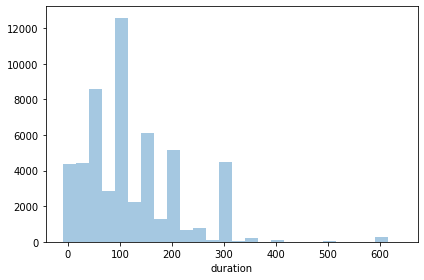

In [44]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
sns.distplot(EDH["duration"], kde=False, bins=range(-10, 650,25), ax=ax)
ax.set_title("")

In [45]:
sddk.write_file("SDAM_data/temporal_uncertainty/EDH_ranges_hist.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/sharingout/648597%40au.dk/SDAM_root/SDAM_data/temporal_uncertainty/EDH_ranges_hist.png"


# Simulations with complete dataset

In [51]:
%%time
EDH_complete_simulations = timeblocks_from_randoms(EDH, "random_dates", [-1000, 1000, 50])

CPU times: user 39.6 s, sys: 428 ms, total: 40 s
Wall time: 40.1 s


In [52]:
EDH_complete_simulations[1]

[((-1000, -951), 0),
 ((-950, -901), 0),
 ((-900, -851), 0),
 ((-850, -801), 0),
 ((-800, -751), 0),
 ((-750, -701), 0),
 ((-700, -651), 0),
 ((-650, -601), 0),
 ((-600, -551), 0),
 ((-550, -501), 1),
 ((-500, -451), 0),
 ((-450, -401), 0),
 ((-400, -351), 2),
 ((-350, -301), 3),
 ((-300, -251), 9),
 ((-250, -201), 16),
 ((-200, -151), 38),
 ((-150, -101), 74),
 ((-100, -51), 230),
 ((-50, -1), 1029),
 ((1, 50), 4776),
 ((51, 100), 6406),
 ((101, 150), 10090),
 ((151, 200), 12526),
 ((201, 250), 11192),
 ((251, 300), 5997),
 ((301, 350), 1593),
 ((351, 400), 1374),
 ((401, 450), 738),
 ((451, 500), 598),
 ((501, 550), 416),
 ((551, 600), 383),
 ((601, 650), 139),
 ((651, 700), 98),
 ((701, 750), 21),
 ((751, 800), 7),
 ((801, 850), 2),
 ((851, 900), 1),
 ((901, 950), 1),
 ((951, 1000), 1)]

In [53]:
def desc_stat_from_simulations(simulations):
  tups_desc = []
  for n in range(len(simulations[0])):
    values = [sim[n][1] for sim in simulations]
    tups_desc.append((simulations[0][n][0], np.min(values), np.max(values), np.mean(values), np.median(values)))
  tups_desc_df = pd.DataFrame(tups_desc)
  tups_desc_df.columns = ["temp_block", "min", "max", "mean", "median"]
  return tups_desc_df

In [54]:
sims_by_blocks = desc_stat_from_simulations(EDH_complete_simulations)
sims_by_blocks.set_index("temp_block", inplace=True)
sims_by_blocks

,min,max,mean,median
temp_block,,,,
"(-1000, -951)",0,0,0.000,0.0
"(-950, -901)",0,0,0.000,0.0
"(-900, -851)",0,0,0.000,0.0
"(-850, -801)",0,0,0.000,0.0
"(-800, -751)",0,0,0.000,0.0
"(-750, -701)",0,0,0.000,0.0
"(-700, -651)",0,0,0.000,0.0
"(-650, -601)",0,0,0.000,0.0
"(-600, -551)",0,0,0.000,0.0


In [55]:
from pandas.plotting import table

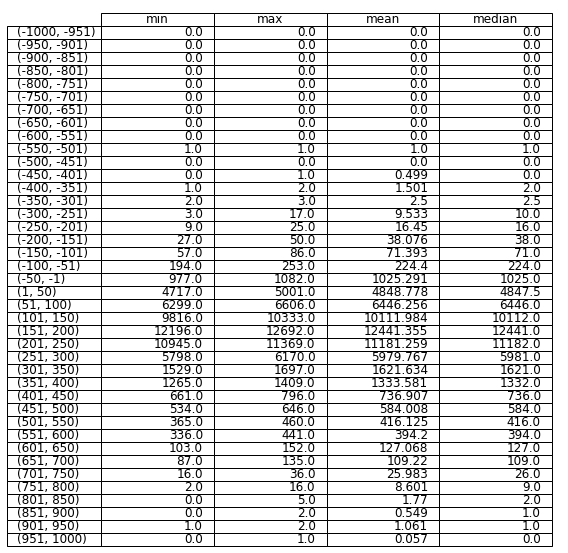

In [56]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)
tabla = table(ax, sims_by_blocks, loc='upper right', colWidths=[0.2]*len(sims_by_blocks.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) 

In [57]:
sddk.write_file("SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/sharingout/648597%40au.dk/SDAM_root/SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.png"


In [58]:
sddk.write_file("SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.csv", sims_by_blocks, conf)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/sharingout/648597%40au.dk/SDAM_root/SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.csv"


In [59]:
# compare in how many instances is there less inscriptions for the first half of the 2nd c. than for the second half.
len([sim for sim in EDH_complete_simulations if sim[18][1] < sim[19][1]])

1000

In [60]:
len([date for date in EDH_date_avr if not np.isnan(date)])

NameError: ignored